In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

%matplotlib inline

In [20]:
pd.set_option('max_columns', 25)

In [21]:
books = pd.read_csv('data/Books.csv')
ratings = pd.read_csv('data/ratings.csv')

In [22]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [23]:
books.tail()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,"Bayou Moon (The Edge, #2)",eng,4.09,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,4.25,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,The Mauritius Command,eng,4.35,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...
9999,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,The First World War,NaN,4.00,9162,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...


### Data Cleaning

In [24]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [25]:
books.isna().sum() 

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

#### Nulll values in books:
- isbn column has 700 Null values.
- isbn13 column has 585 null values. 
- original_publication_year column has 21 Null values.
- original _title column has 585 Null values.

In [26]:
ratings.isna().sum()

book_id    0
user_id    0
rating     0
dtype: int64

#### Null values in ratings:
- ratings dataset has no null values.

### Is there any duplicate values present?

In [27]:
#in the books dataset we are concern about only original_title column.
books['original_title'].duplicated().sum()    #check original_title has duplicate values or not.

725

In [28]:
#remove or drop duplicate items from the dataframe

books.drop_duplicates(subset = 'original_title', keep=False, inplace=True)
books.shape

(9151, 23)

In [29]:
# Let's check if there are duplicate values are present in the ratings dataset.
ratings[['user_id', 'book_id']].duplicated().sum()

2278

In [30]:
# The main point to consider here is any user can give ratings to multiple books,
# so that will not as duplicate data. For this condition to be true we will use subset of both of the columns.

ratings.drop_duplicates(subset = ['user_id', 'book_id'], keep=False, inplace=True)
ratings.shape

(977269, 3)

### Exploratory Data Analysis:
- Plot comman rating values.
- Top 10 Reviews per user
- Number of ratings per book
- What readers prefer? short title or long titles? 
- Rating vs Frequency of each rating (ranging from 1-5)

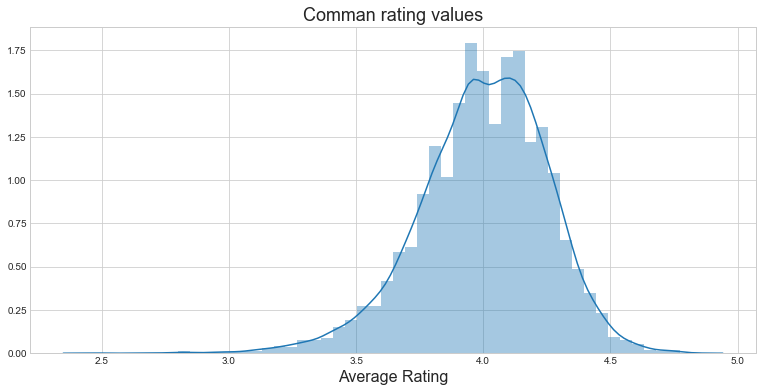

In [31]:
plt.figure(figsize=(13, 6))
sns.distplot(a=books['average_rating'], kde=True)
plt.xlabel('Average Rating', fontsize=16)
plt.title('Comman rating values', fontsize=18)
plt.show()

#### From above plot it seems like most users gave rating 4 most of the times.

In [32]:
per_user_reviews = ratings.groupby('user_id')['user_id'].apply(lambda i: len(i))

In [38]:
top_10_per_user_reviews =  per_user_reviews.sort_values(ascending=False)[:10]
top_10_per_user_reviews

user_id
12874    200
30944    200
28158    199
12381    199
52036    199
45554    197
6630     197
15604    196
19729    196
9668     196
Name: user_id, dtype: int64

[]

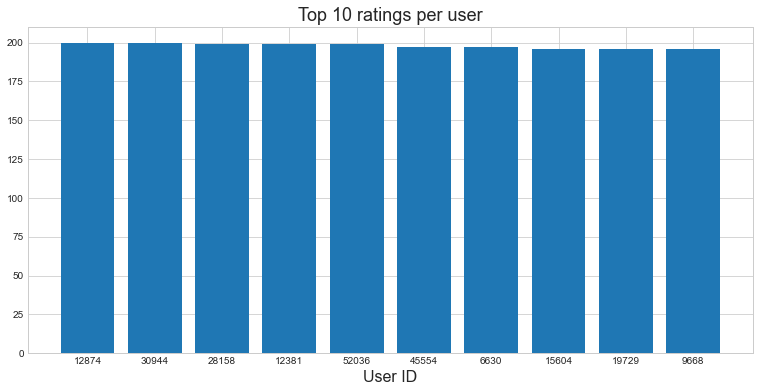

In [39]:
user_id = top_10_per_user_reviews.index.tolist()

plt.figure(figsize=(13, 6))
plt.bar(np.arange(len(user_id)) ,top_10_per_user_reviews)
plt.xticks(np.arange(len(user_id)), user_id)
plt.xlabel('User ID', fontsize=16)
plt.title("Top 10 ratings per user", fontsize=18)
plt.plot()

In [40]:
reviews_per_book = ratings.groupby('book_id').count()
reviews_per_book

,user_id,rating
book_id,,
1,100,100
2,100,100
3,100,100
4,100,100
5,100,100
...,...,...
9996,96,96
9997,89,89
9998,95,95


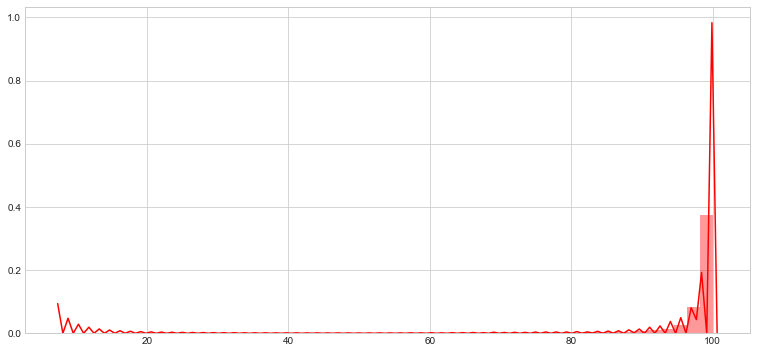

In [41]:
plt.figure(figsize=(13, 6))

sns.distplot(a=reviews_per_book, kde=True, color='r')

#### Most of the books got reviews more than 80.

In [42]:
books['title_length'] = books['original_title'].str.len()

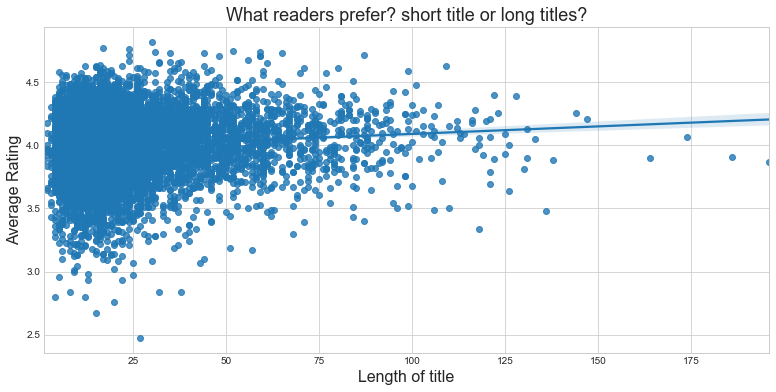

In [43]:
plt.figure(figsize=(13, 6))
sns.regplot(x=books['title_length'], y=books['average_rating'])
plt.xlabel('Length of title', fontsize=16)
plt.ylabel('Average Rating', fontsize=16)
plt.title('What readers prefer? short title or long titles?', fontsize=18)
plt.show()

#### Seems, like people highly rated short titles rather than longer titles.

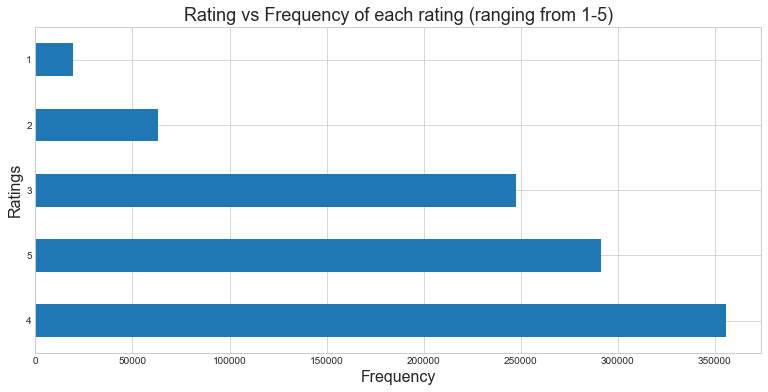

In [44]:
plt.figure(figsize=(13, 6))
ratings['rating'].value_counts().plot(kind='barh')
plt.ylabel('Ratings', fontsize=16)
plt.xlabel('Frequency', fontsize=16)
plt.title('Rating vs Frequency of each rating (ranging from 1-5)', fontsize=18)
plt.show()

### Most of the users gave 4 ratings followed by 5.

## Content Based Recommendation:

In [45]:
books = books.fillna(' ')

In [46]:
books.isna().sum()

id                           0
book_id                      0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
title_length                 0
dtype: int64

In [47]:
def clean_data(x):
    """ clean data and make all words lowecase """
    return str.lower(x.replace(" ", ""))

In [48]:
features = ['original_title', 'authors', 'average_rating']
books_df = books[features].astype(str)

In [49]:
books_df.head()

,original_title,authors,average_rating
0,The Hunger Games,Suzanne Collins,4.34
1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4.44
3,To Kill a Mockingbird,Harper Lee,4.25
4,The Great Gatsby,F. Scott Fitzgerald,3.89
5,The Fault in Our Stars,John Green,4.26


In [50]:
for feature in features:
    books_df[feature] = books_df[feature].apply(clean_data)

In [51]:
def bag_of_words(x):
    """xoncatenate title, authors and average rating"""
    return x['original_title'] + ' ' + x['authors'] + ' ' + x['average_rating']

In [52]:
books_df['BOG'] = books_df.apply(bag_of_words, axis=1)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [54]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books_df['BOG'])
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [55]:
books_df = books_df.reset_index()
indices = pd.Series(books_df.index, index=books_df['original_title'])

In [56]:
def get_recommendations(title, cosine_sim=cosine_similarity):
    """This function will return top 10 similar movies"""
    
    title = title.replace(' ', '').lower() #preprocessing
    idx = indices[title]
    
    #pairwise similarity scores of all movies with given movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #sort movies based on the similarity score
    sim_scores = sorted(sim_scores, key=lambda i: i[1], reverse=True)
    
    #scores for top 10 movies
    sim_scores = sim_scores[1:11]
    
    #get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    
    return list(books['original_title'].iloc[movie_indices])

In [59]:
recommended = get_recommendations('The Hobbit', cosine_similarity)

In [60]:
recommended

['Next',
 'The Hobbit or There and Back Again',
 'The Lord of the Rings',
 ' The Fellowship of the Ring',
 'The Two Towers',
 'The Hobbit and The Lord of the Rings',
 'The Return of the King',
 'The Tommyknockers',
 'The Tenth Circle',
 'City of Heavenly Fire']